In [1]:
import os 
import sys 
from SourceFiles.teproteus import TEProteusAdmin as TepAdmin
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# connect
admin = TepAdmin() #required to control PXI module
sid = 8 #PXI slot WDS found
inst = admin.open_instrument(slot_id=sid)
resp = inst.send_scpi_query("*IDN?")
print('connected to: ' + resp) # Print *IDN

Load TEProteus.dll from : C:\Windows\system32\TEProteus.dll
connected to: Tabor Electronics,P9484M,000002243278,1.237.0 --slot#: 8,


In [3]:
# initialize
inst.send_scpi_cmd('*CLS; *RST')

0

In [4]:
adc_chan=1
adc_rate=2700E6
wav1 = np.zeros(4800, dtype=np.uint16)

inst.send_scpi_cmd(':DIG:MODE DUAL')
inst.send_scpi_cmd(':DIG:FREQ {0}'.format(adc_rate));  


inst.send_scpi_cmd(':DIG:CHAN:SEL {0}'.format(adc_chan)); 
inst.send_scpi_cmd(':DIG:ACQ:FREE'); # reset memory of this channel
inst.send_scpi_cmd(':DIG:CHAN:RANG LOW');
inst.send_scpi_cmd(':DIG:CHAN:STATE ENAB');
inst.send_scpi_cmd(':DIG:TRIG:SOUR CPU');
inst.send_scpi_cmd(':DIG:ACQ:DEF {0}, {1}'.format(1,4800));
inst.send_scpi_cmd(':DIG:INIT ON')



0

In [5]:
inst.send_scpi_cmd(':DIG:TRIG')

0

9600


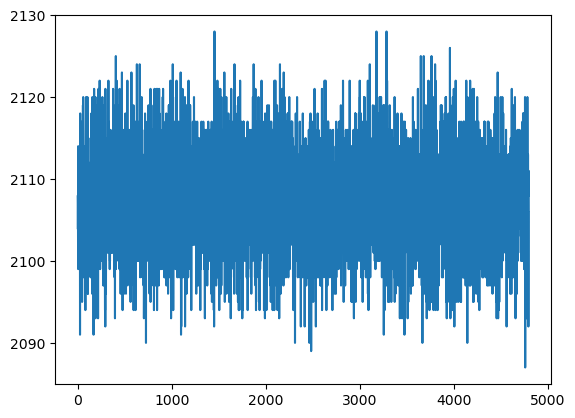

In [6]:
inst.send_scpi_cmd(':DIG:DATA:SEL ALL')
inst.send_scpi_cmd(':DIG:DATA:TYPE FRAM')
resp = inst.send_scpi_query(':DIG:DATA:SIZE?')
print(resp)
rc = inst.read_binary_data(':DIG:DATA:READ?', wav1, 4800)
plt.plot(wav1)
plt.show()

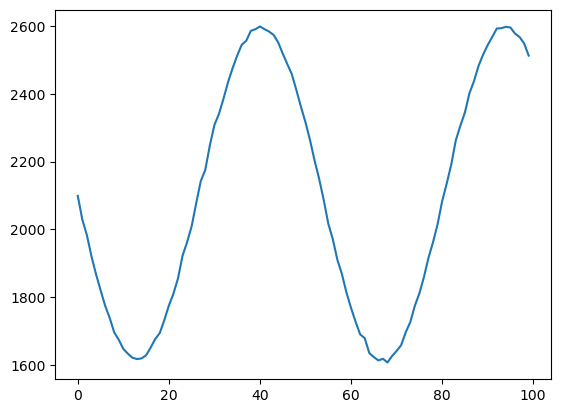

In [36]:
plt.plot(wav1[0:100])

In [37]:
def digital_to_analog(signal,bit,voltage_range_pp):
    return -voltage_range_pp/2+(signal/(2**bit-1))*voltage_range_pp

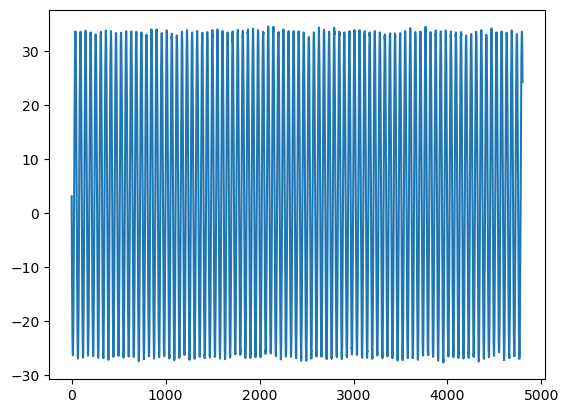

In [38]:
signal=digital_to_analog(wav1,12,250)
plt.plot(signal)